In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('training_data_trainer_refactored.csv')
df.head()

,Session_id,Training_name,Trainer_name,Start_time,End_time,Duration,UserType,Status
0,66190350145643268cbde9e9,SQL,Satyam Pandey S,2024-04-12 09:39:00,2024-04-12 12:29:00,170,Employee,Not Completed
1,66190350145643268cbde9ea,DevOps Operations,Anto Arokia Mary N L,2024-04-12 06:56:00,2024-04-12 07:56:00,60,Intern,Completed
2,66190350145643268cbde9eb,UI / UX Concept Figma,Hariharan N,2024-04-12 10:48:00,2024-04-12 10:51:00,3,Employee,Completed
3,66190350145643268cbde9ec,Git & Version Control,Gayathri G S,2024-04-12 09:43:00,2024-04-12 10:34:00,51,Intern,Completed
4,66190350145643268cbde9ed,Quality Assurance Basics,Sivamalini V,2024-04-12 00:55:00,2024-04-12 00:53:00,-2,Employee,Completed


In [25]:
cols_to_drop = ['Session_id', 'Start_time', 'End_time']

for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

df.head()

,Training_name,Trainer_name,Duration,UserType,Status
0,SQL,Satyam Pandey S,170,Employee,Not Completed
1,DevOps Operations,Anto Arokia Mary N L,60,Intern,Completed
2,UI / UX Concept Figma,Hariharan N,3,Employee,Completed
3,Git & Version Control,Gayathri G S,51,Intern,Completed
4,Quality Assurance Basics,Sivamalini V,-2,Employee,Completed


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = ['Training_name','Trainer_name','UserType','Status','Trainer_name']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Training_name,Trainer_name,Duration,UserType,Status
0,9,48,170,0,1
1,3,5,60,1,0
2,11,19,3,0,0
3,4,16,51,1,0
4,7,51,-2,0,0


In [28]:
# Split data into features (X) and target variable (y)
X = df.drop([ 'Duration'],axis  = 1)  # Excluding 'START_DATE' and 'END_DATE'
y = df['Duration']
X.head()

,Training_name,Trainer_name,UserType,Status
0,9,48,0,1
1,3,5,1,0
2,11,19,0,0
3,4,16,1,0
4,7,51,0,0


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
model = AutoSklearnRegressor(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs= -1)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())

# evaluate best model
y_hat = model.predict(X_test)
mae = mean_absolute_error(y_test, y_hat)

auto-sklearn results:
  Dataset name: 8737c1b2-f8f5-11ee-bdb9-599d8c40c34c
  Metric: r2
  Best validation score: 0.949756
  Number of target algorithm runs: 93
  Number of successful target algorithm runs: 87
  Number of crashed target algorithm runs: 5
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [39]:
print(model.leaderboard())

          rank  ensemble_weight               type      cost  duration
model_id                                                              
73           1             0.66   gaussian_process  0.050244  2.514036
50           2             0.14   gaussian_process  0.051616  2.913706
33           3             0.04  gradient_boosting  0.056719  1.520061
84           4             0.16  gradient_boosting  0.057647  1.089221


In [35]:
r2 = r2_score(y_test,y_hat)
mse = mean_squared_error(y_test,y_hat)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("r2_score: %.3f" % r2)


MSE: 369.282
MAE: 13.610
r2_score: 0.948


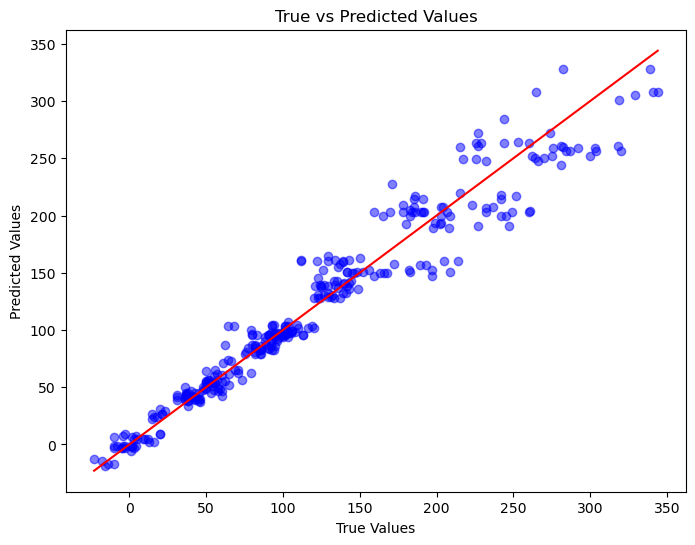

In [18]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat, color='blue', alpha=0.5)  # Scatter plot of true vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [40]:
import joblib

In [41]:
joblib.dump(model, 'trained_model.pkl')
joblib.dump(label_encoder,'label_encoder.pkl')

['label_encoder.pkl']